In [26]:
import pandas as pd

df = pd.read_csv("loan.csv")

df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Y
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<span style="color: blue; font-size: 24px;"> Lets Scale the Numerical Data using MinMaxScaler</span>


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Y
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,Master's,Full-time,Married,No,No,Other,Yes,0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,High School,Full-time,Married,No,No,Business,No,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<span style="color: blue; font-size: 24px;"> Lets see the Histogram of different Variables</span>


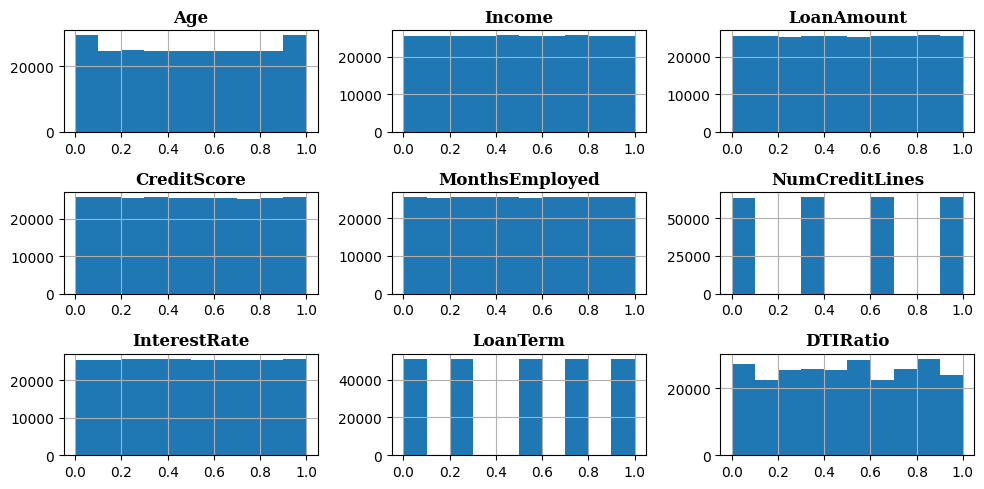

In [28]:
df_no_y = df.drop(columns=['Y'])
axes = df_no_y.hist(figsize=(10, 5), bins=10)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, fontweight='bold', family='serif')
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, fontweight='bold', family='serif')
    ax.set_title(ax.get_title(), fontsize=12, fontweight='bold', family='serif')
plt.tight_layout()
plt.show()

<span style="color: blue; font-size: 24px;"> Now let's create dummy variables because there are categroical variables.</span>


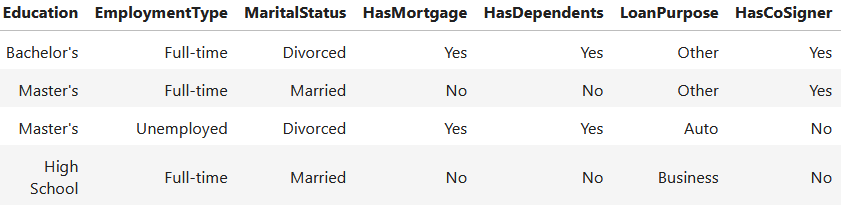

In [29]:
import pandas as pd

# Convert categorical columns to dummy variables
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                    'HasDependents', 'LoanPurpose', 'HasCoSigner']
# Create dummy variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Y,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0,...,0,0,0,1,1,0,0,0,1,1
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0,...,0,1,0,0,0,0,0,0,1,1
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,1,...,1,0,0,1,1,0,0,0,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0,...,0,1,0,0,0,1,0,0,0,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,...,1,0,0,0,1,0,0,0,0,0


<span style="color: blue; font-size: 24px;"> Now let's run logistic model on unbalanced data</span>

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(columns=['Y'])  # Replace with your actual target column
Y = df['Y']

# Optionally, split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify= Y)

# Train the Logistic Regression model
model = LogisticRegression( C=1.0, max_iter=4000)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8851772077540631
Confusion Matrix:
[[45008   131]
 [ 5733   198]]


<span style="color: blue; font-size: 24px;"> Above you can see that Accuracy is high but the true positives are low at 198 </span>


<span style="color: blue; font-size: 24px;"> Lets use a balanced dataset in the model below</span>


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state = 10)
#######
undersampler = RandomUnderSampler()

# Fit and transform the training data
X_train, Y_train = undersampler.fit_resample(X_train, Y_train)

model = LogisticRegression(C=1.0 , max_iter=4000)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6777364401801449
Confusion Matrix:
[[30530 14609]
 [ 1849  4082]]


<span style="color: blue; font-size: 24px;"> Above you can see that accuracy fell but now we are catching more potential defaulters. 4082 defaulters to be exact! 4082 VS 198 with no dataset balancing </span>


<span style="color: blue; font-size: 24px;"> This is the Accuracy rate of different models without balanced labels</span>


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=4000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SGD Classifier': SGDClassifier(loss='hinge', max_iter=4000),
    'MLP': MLPClassifier(hidden_layer_sizes=(200,), max_iter= 200)
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Extract metrics from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()  # Assuming binary classification
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn
    })

# Convert results to DataFrame
NoUndersampling = pd.DataFrame(results)

NoUndersampling

,Model,Accuracy,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,0.885432,220,44999,140,5711
1,Random Forest,0.885353,173,45042,97,5758
2,SGD Classifier,0.883865,0,45139,0,5931
3,MLP,0.883376,523,44591,548,5408



<span style="color: blue; font-size: 24px;"> Notice above How the True Positives are really low. That happens when no undersampling is done to balance the dataset</span>


<span style="color: blue; font-size: 24px;"> This is the Accuracy rate WITH balanced dataset. True Positives will go up because of the balancing of the dataset.</span>


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

# Initialize and apply RandomUnderSampler
undersampler = RandomUnderSampler()
X_train, Y_train = undersampler.fit_resample(X_train, Y_train)

# Initialize and train classifiers
models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=4000),    
    'Logistic Regression High Reg': LogisticRegression(C=1.0), 
    'Random Forest': RandomForestClassifier(n_estimators=200, max_features='sqrt'),
    'SGD Classifier': SGDClassifier(loss='hinge', max_iter=4000),
    'MLP': MLPClassifier( max_iter= 250)
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Extract metrics from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()  # Assuming binary classification
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn
    })

# Convert results to DataFrame
WithUndersampling = pd.DataFrame(results)

WithUndersampling

C:\Users\faraz\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,0.677188,4132,30452,14687,1799
1,Logistic Regression No Iter,0.677188,4132,30452,14687,1799
2,Logistic Regression High Reg,0.676934,4132,30439,14700,1799
3,Random Forest,0.685393,4020,30983,14156,1911
4,SGD Classifier,0.666810,4204,29850,15289,1727
5,MLP,0.651204,3860,29397,15742,2071


<span style="color: blue; font-size: 24px;"> Notice Above How True Positives are High at ~4000 because we balanced out data </span>


<span style="color: blue; font-size: 24px;"> Lets try cross validation</span>


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

# Initialize and apply RandomUnderSampler
undersampler = RandomUnderSampler()
X_train, Y_train = undersampler.fit_resample(X_train, Y_train)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000),
    'Logistic Regression High Reg': LogisticRegression(C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_features='sqrt'),
    'SGD Classifier': SGDClassifier(loss='hinge', max_iter=4000),
    'MLP': MLPClassifier(max_iter=250)
}

results = []

# Define a scoring function to use with cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
for name, model in models.items():
    # Perform cross-validation
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)
    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_precision = cv_results['test_precision'].mean()
    mean_recall = cv_results['test_recall'].mean()
    mean_f1 = cv_results['test_f1'].mean()
    
    # Train on the full training set and make predictions on the test set
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()  # Assuming binary classification
    results.append({
        'Model': name,
        'Cross-Validated Accuracy': mean_accuracy,
        'Cross-Validated Precision': mean_precision,
        'Cross-Validated Recall': mean_recall,
        'Cross-Validated F1 Score': mean_f1,
        'Test Accuracy': accuracy,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn
    })
WithUndersampling = pd.DataFrame(results)

In [37]:
WithUndersampling

,Model,Cross-Validated Accuracy,Cross-Validated Precision,Cross-Validated Recall,Cross-Validated F1 Score,Test Accuracy,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,0.680065,0.677075,0.688601,0.682782,0.678148,4074,30559,14580,1857
1,Logistic Regression High Reg,0.680065,0.677075,0.688601,0.682782,0.678148,4074,30559,14580,1857
2,Random Forest,0.673826,0.676494,0.666343,0.671366,0.688212,3935,31212,13927,1996
3,SGD Classifier,0.679390,0.679780,0.679285,0.679071,0.711749,3760,32589,12550,2171
4,MLP,0.668978,0.674981,0.652811,0.663369,0.682808,3948,30923,14216,1983


<span style="color: blue; font-size: 24px;"> You can see above that our results are consistant</span>
